In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from sklearn.datasets import make_blobs
import random as rd 
import numpy as np

%matplotlib inline

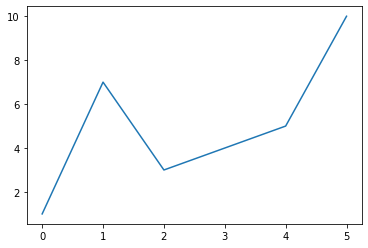

In [2]:
plt.plot([1,7,3,4,5,10])
plt.show()

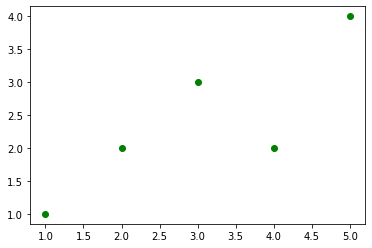

In [3]:
plt.plot([1,2,3,4,5],[1,2,3,2,4], "go")
plt.show()

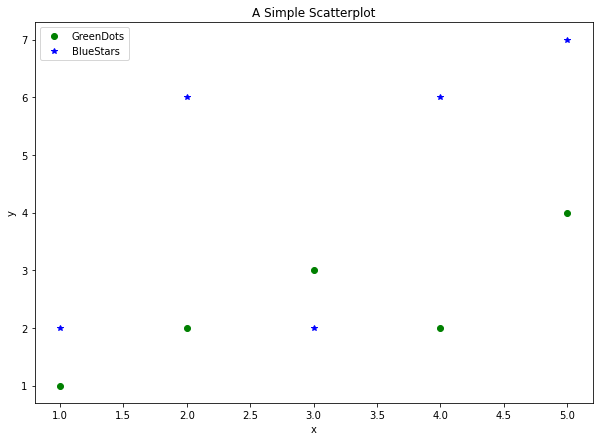

In [4]:
plt.figure(figsize=(10,7))
plt.plot([1,2,3,4,5],[1,2,3,2,4], "go", label="GreenDots")
plt.plot([1,2,3,4,5],[2,6,2,6,7], "b*", label="BlueStars")
plt.title("A Simple Scatterplot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()

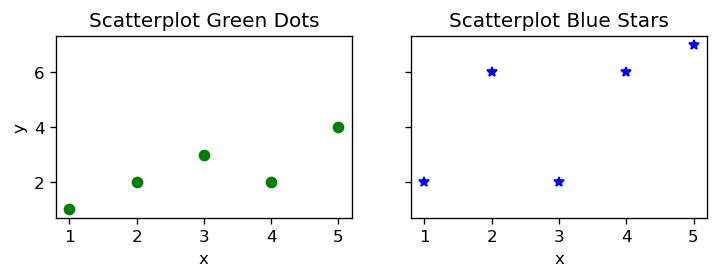

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,2), sharey=True, dpi=120)
ax1.plot([1,2,3,4,5],[1,2,3,2,4], "go", label="GreenDots")
ax2.plot([1,2,3,4,5],[2,6,2,6,7], "b*", label="BlueStars")
ax1.set_title("Scatterplot Green Dots"); ax2.set_title("Scatterplot Blue Stars")
ax1.set_xlabel("x"); ax1.set_ylabel("y")
ax2.set_xlabel("x")#; ax2.set_ylabel("y")
plt.show()

In [6]:
data = [1,2,3,4,5]
df = pd.DataFrame(data)
print(df)

   0
0  1
1  2
2  3
3  4
4  5


In [7]:
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['People Name','Age'])
print(df)

  People Name  Age
0        Alex   10
1         Bob   12
2      Clarke   13


In [8]:
df.iloc[1:3]

,People Name,Age
1,Bob,12
2,Clarke,13


In [9]:
df["People Name"][1]

'Bob'

In [10]:
df.Age

0    10
1    12
2    13
Name: Age, dtype: int64

In [11]:
df[df["Age"]>11]

,People Name,Age
1,Bob,12
2,Clarke,13


In [12]:
def generate_2d_data(number_of_points):
    """
    Generates a set of 2d coordinates, each axis between 0 and 99.
    """
    X, _ = make_blobs(n_samples=number_of_points, centers=rd.randint(2,10), n_features=2, random_state=0)
    return X

values = generate_2d_data(1000)

stats = linregress(values)
m = stats.slope
b = stats.intercept

In [13]:
print(m, b)

0.19280405524573935 1.5995965092689404


In [14]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

In [15]:
print(ser)

0         01 Jan 2010
1          02-02-2011
2            20120303
3          2013/04/04
4          2014-05-05
5    2015-06-06T12:20
dtype: object


In [16]:
ser = pd.to_datetime(ser)
print(ser)

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]


In [17]:
ser.dt.day

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [18]:
ser.dt.month

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [19]:
ser.dt.year

0    2010
1    2011
2    2012
3    2013
4    2014
5    2015
dtype: int64

In [20]:
ser.dt.week

0    53
1     5
2     9
3    14
4    19
5    23
dtype: int64

In [21]:
ser.dt.week.to_list()

[53, 5, 9, 14, 19, 23]

In [22]:
day_of_year = ser.dt.dayofyear
ser.dt.day_name().to_list()

['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']

In [23]:
ser.dt.strftime('%Y-%m-04')

0    2010-01-04
1    2011-02-04
2    2012-03-04
3    2013-04-04
4    2014-05-04
5    2015-06-04
dtype: object

In [24]:
data = np.random.randint(5,30,size=10)
df = pd.DataFrame(data, columns=['random_numbers'])
df_max = df[(df.shift(1) < df) & (df.shift(-1) < df)]

In [25]:
df_max.dropna()

,random_numbers
1,13.0
3,28.0
8,19.0


In [27]:
dd = np.diff(np.sign(np.diff(df)))

<hr>

In [30]:
import pandas as pd
import requests

In [33]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv"
x = requests.get(url=url).content 
pd.read_csv(io.StringIO(x.decode('utf8')))

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [35]:
pd.read_csv(url)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
